In [ ]:
# 감성 분석

import pandas as pd

knu = pd.read_csv("/content/knu_sentiment_lexicon.csv")
knu

,word,polarity
0,ㅡㅡ,-1
1,ㅠㅠ,-1
2,ㅠ_ㅠ,-1
3,ㅠ,-1
4,ㅜㅡ,-1
...,...,...
14849,(^-^),1
14850,(;_;),-1
14851,(-_-),-1
14852,(-;,1


In [ ]:
for w, p in zip(knu['word'], knu['polarity']):
    print(w, p)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
무서워하는 -2
무서워서 지르는 -2
무서워서 간신히 -2
무서워서 -2
무서워 -2
무서움을 느낄 -2
무서움을 -2
무서움 때문에 -2
무서움 -2
무서울 정도로 -2
무서울 -2
무서운 사람 -2
무서운 말이나 -2
무서운 느낌이 -2
무서운 꿈에 -2
무서운 -2
무사히 1
무분별한 -2
무모한 -1
무모하다 -1
무리하다 -1
무리하게 -1
무리에서 기피하여 -1
무리에서 기피되어 -1
무릎이 시리고 -1
무르고 부드럽다 1
무르고 부드러운 1
무르게 생긴 -1
무료로 1
무례함 -2
무례한 사람을 -2
무례한 데가 -2
무례한 것으로 -2
무례한 -2
무례하다 -2
무량한 마음을 1
무뚝뚝하다 -1
무디다 -2
무더위로 -2
무단결석 -2
무단 결석 -2
무능한 -1
무능하다 -1
무능력 -1
무뇌충 -2
무너짐 -2
무너지다 -2
무너지는 소리가 -2
무너지는 -2
무너지게 하다 -2
무너지게 -2
무너뜨리다 -2
무기력함 -1
무기력한 -2
무기력하다 -1
무기력 -2
무궁무진하다 1
무관심한 -1
무관심하다 -2
무관심 -1
무게가 있다 1
무게가 있는 1
무게가 있게 1
무게 있게 1
무겁다 -1
무겁고 투박하다 -2
무겁거나 하여 -1
무거운 분위기나 -2
무거운 발걸음으로 -2
무거운 기운이 -2
무거운 걸음으로 -2
무가치하고 무의미하게 -2
무가치하고 -2
무가치 -1
몽땅 없애다 -2
몽땅 빼앗거나 -2
못함을 -1
못할 만한 -1
못할 만큼 -1
못한 형편을 -2
못한 자는 -1
못한 상태이다 -2
못한 데가 -2
못한 -1
못하여 어수선하고 -2
못하여 안타깝다 -2
못하여 순진하고 -1
못하여 당하다 -2
못하여 -1
못하도록 억지로 -2
못하도록 -1
못하던 일 -1
못하던 -1
못하다 -2
못하는 상태로 -1
못하는 상태가 -2
못하는 상태 -1
못하는 모양 -1
못하는 결점 -2
못하고 희미하게 -1
못하고 허술한 -2
못하고 쪼들리게 -2
못하고 엉성하고 -

In [ ]:
from bs4 import BeautifulSoup
from tqdm import tqdm
import requests
import time
import random

total = []

for n in tqdm(range(1, 3992, 10)):
    url = requests.get("https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EA%B4%91%EC%9A%B4%EB%8C%80&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=49&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start={}".format(n))
    html = BeautifulSoup(url.text)

    news = html.find("ul", class_ = 'list_news').find_all("li", class_ = 'bx')

    for i in news:
        title = i.find("a", class_ = "news_tit")['title']
        summary = i.find("div", class_ = 'dsc_wrap').text
        total.append([title, summary])

    time.sleep(random.random())

100%|██████████| 400/400 [06:41<00:00,  1.00s/it]


In [ ]:
len(total)

4000

In [ ]:
df = pd.DataFrame(total, columns = ['제목', '요약'])
df = df.drop_duplicates()
df.to_excel("my_news.xlsx")
df

,제목,요약
0,"광운대 역세권, 호텔·업무 복합타운 개발",서울시 지구단위계획 공고 광운대역 물류용지 15만㎡ 아파트·오피스텔 3930가구 ...
1,최익훈 HDC현대산업개발 대표이사 “변화 통한 위기 극복…고객 신뢰 회복할 수 있도...,서울대학교 건축학과 교수이자 한국콘크리트학회 회장 박홍근 단장을 필두로 34년 건...
2,“지구단위계획 초읽기에 전담조직 신설까지”…2조8000억 원 ‘광운대역세권’ 개발 탄력,이투데이=박민웅 기자 | 서울 노원구 월계동 일대 ‘광운대역세권 개발사업’에 탄력...
3,"광운대 정보과학교육원, 대학교 정시 추가모집 앞두고 100%면접전형 진행 중",이러한 상황에 대학교 정시 추가모집 기간을 앞두고 인서울 4년제 대학교 광운대학교...
4,새해 턴어라운드 기대하는 HDC그룹...위기 딛고 광운대 역세권 개발 승부수,HDC현산이 주도하는 복합 개발 사업인 광운대 역세권 개발 사업을 수행할 ‘H1 ...
...,...,...
3995,[김형일의 대학 입학처 방문기 (6) ] 광운대학교,● [거인의어깨 김형일 대표가 바라 본 광운대 지원전략] 거인의어깨 김형일 대표 ...
3996,[U리그 12R 포토스케치] 경기 칼빈대학교 VS 서울 광운대학교,6월 15일 용인 종합운동장에서 펼쳐진 2018 U리그 3권역 경기 칼빈대학교와...
3997,[캠퍼스 소식] 광운대 학교법인 광운학원 출판기념회 外,개최 광운대학교 학교법인 광운학원은 오는 15일 서울 노원구 광운대 동해문화예술관...
3998,"광운대·숭실사이버대, 상호교류 및 협력 증진 위한 상호협력(MOU) 체결",광운대학교(총장 유지상)과 숭실사이버대학교(총장 한헌수)가 2021년 11월 10...


In [ ]:
score_box = []
for title, summary in zip(df['제목'], df['요약']):
    t = title + " " + summary
    score = 0
    for w, p in zip(knu['word'], knu['polarity']):
        if w in t:
            score += p
    score_box.append(score)

In [ ]:
# 기생충
df['점수'] = score_box
df = df.sort_values(by = '점수')
df.to_excel("my_news.xlsx")
df

,제목,요약,점수
3422,"광운대역 물류기지서 벌크차에 떨어져 50대 사망, 노조 측""만성 인력 부족, 지난해...",광운대역 물류 업무를 담당하던 50대 철도 노동자가 근무 도중 사망하는 사고가 발...,-10
2165,"광운대 전자융합공학과 심준섭 교수, 질병인터넷 플랫폼 개발","광운대학교는 심준섭 전자융합공학과 교수 연구팀이 질병인터넷(IoD, Interne...",-10
3076,[TV조선 단독] 조무성 전 광운대 이사장의 수상한 병보석,광운대 이사장이 병원을 벗어나 무단으로 집에 다녀온 것으로 확인됐습니다. 파킨슨병...,-9
603,국민대·광운대서 홍역 환자 발생…11명 확진,국민대와 광운대에서 홍역 환자가 발생해 보건당국이 감염 경로를 파악하고 있다. 1...,-8
1122,국민대·광운대 등 홍역 집단 발병…11명 확진 ‘비상’,사진=국민대학교 홈페이지에 올라온 홍역 관련 공지글 [헤럴드생생뉴스] 국민대와 광...,-8
...,...,...,...
1706,"광운대, 2021학년도 전기 학위수여식...1835명 졸업","졸업생 대표 원종찬 씨는 ""학업을 성공적으로 마친 것처럼 광운의 졸업생들은 사회에...",10
1102,"[U-리그] 광운대, 강릉 원정서 8-3으로 경희대 압도",광운대가 1일(금) 강릉 하키센터에서 열린 2019 U-리그 15라운드 경희대전을...,10
3565,"광운대 총동문회, 지하캠퍼스 건립기금 1억원 기탁","이 회장은 ""모교발전과 후배를 사랑하는 마음으로 대학발전기금을 기탁하게 됐다""며 ...",10
3847,"10월의 마지막 밤, 광운대 캠퍼스에 클래식 선율 가득","광운대 유지상 총장은 ""학교를 위하는 마음으로 시작된 작은 정성들이 광운의 발전을...",10


In [ ]:
import pickle

# open : 파일을 만들거나 불러올 때
f = open("test.txt", 'wt') # write text

for n in range(1, 11):
    f.write("{}번째 줄입니다.\n".format(n)) # \n : 엔터키

f.close() # 저장하고 끄는 기능

In [ ]:
f = open("test.txt", 'at') # attach text

for n in range(1, 11):
    f.write("{}번째 줄입니다.\n".format(n)) # \n : 엔터키

f.close() # 저장하고 끄는 기능

In [ ]:
f = open("test.txt", 'rt') # read text

text = f.read()

f.close()

text

'1번째 줄입니다.\n2번째 줄입니다.\n3번째 줄입니다.\n4번째 줄입니다.\n5번째 줄입니다.\n6번째 줄입니다.\n7번째 줄입니다.\n8번째 줄입니다.\n9번째 줄입니다.\n10번째 줄입니다.\n1번째 줄입니다.\n2번째 줄입니다.\n3번째 줄입니다.\n4번째 줄입니다.\n5번째 줄입니다.\n6번째 줄입니다.\n7번째 줄입니다.\n8번째 줄입니다.\n9번째 줄입니다.\n10번째 줄입니다.\n'

In [ ]:
import pickle # 객체를 저장하거나 불러올 때

box = [1,3,5,4,2]

f = open("my_list.dat", 'wb') # write binary
pickle.dump(box, f)
f.close()

In [ ]:
f = open("my_list.dat", 'rb') # read binary
data = pickle.load(f)
f.close()

data

[1, 3, 5, 4, 2]

In [ ]:
data[0]

1

In [ ]:
f = open("fish.dat", 'rb')
fish = pickle.load(f)
f.close()

# 머신러닝(편한버전) : 혼자공부하는 머신러닝 + 딥러닝 / 모두의 딥러닝
# 머신러닝(힘든버전) : 밑바닥부터 시작하는 딥러닝 시리즈

# 도미, 빙어 // 
fish.keys()

dict_keys(['bream_length', 'bream_weight', 'smelt_length', 'smelt_weight'])

In [ ]:
import matplotlib.pyplot as plt

bream_length = fish['bream_length']
bream_weight = fish['bream_weight']

smelt_length = fish['smelt_length']
smelt_weight = fish['smelt_weight']

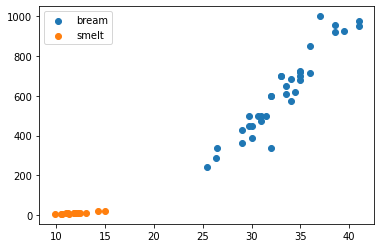

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.legend(['bream', 'smelt'])

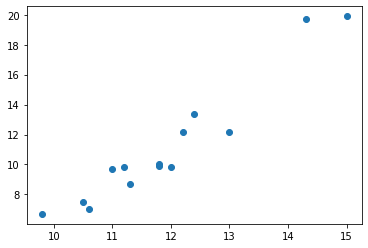

In [ ]:
plt.scatter(smelt_length, smelt_weight)

In [ ]:
# K 최근접 이웃 분류 모델

# 모든 머신러닝 학습 데이터 : 행렬

import numpy as np

np.array([1,3,5,4,2]) + 10

array([11, 13, 15, 14, 12])

In [ ]:
# 도미 : 35마리
bream_length = fish['bream_length']
bream_weight = fish['bream_weight']

# 빙어 : 14마리
smelt_length = fish['smelt_length']
smelt_weight = fish['smelt_weight']

# 지도학습
# 문제집 : 길이와 무게
# 정답지 : 도미와 빙어

length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [ ]:
len(length)

49

In [ ]:
data = []

for i in range(49):
    data.append([length[i], weight[i]])

data

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [ ]:
target = [1] * 35 + [0] * 14
target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
# sklearn
# 문제집 : 2차원 행렬
# 정답지 : 1차원 행렬

data = np.array(data) # 2차원 행렬
target = np.array(target) # 1차원 행렬

In [ ]:
data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [ ]:
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [ ]:
# K 최근접 이웃 분류 모델

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier() # 모델 생성(이웃수 : 5개)
model.fit(data, target) # 학습

KNeighborsClassifier()

In [ ]:
model.predict([[40, 600]]) # 예측 // 학습을 2차원으로 했으니까 예측도 2차원으로 예측해야함

array([1])

In [ ]:
model.predict(data) # 예측값

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [ ]:
target # 실제값

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [ ]:
# 왜 정확도가 100% 가 나왔을까?
model.score(data, target) # data로 예측한 예측값과 실제값 target을 비교해서 얼마나 맞았는지 세라.

1.0

In [ ]:
for n in range(1, 49):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(data, target)
    score = model.score(data, target)
    print("이웃수:{}, 정확도:{}".format(n, score))

이웃수:1, 정확도:1.0
이웃수:2, 정확도:1.0
이웃수:3, 정확도:1.0
이웃수:4, 정확도:1.0
이웃수:5, 정확도:1.0
이웃수:6, 정확도:1.0
이웃수:7, 정확도:1.0
이웃수:8, 정확도:1.0
이웃수:9, 정확도:1.0
이웃수:10, 정확도:1.0
이웃수:11, 정확도:1.0
이웃수:12, 정확도:1.0
이웃수:13, 정확도:1.0
이웃수:14, 정확도:1.0
이웃수:15, 정확도:1.0
이웃수:16, 정확도:1.0
이웃수:17, 정확도:1.0
이웃수:18, 정확도:0.9795918367346939
이웃수:19, 정확도:0.9795918367346939
이웃수:20, 정확도:0.9795918367346939
이웃수:21, 정확도:0.9795918367346939
이웃수:22, 정확도:0.9795918367346939
이웃수:23, 정확도:0.9795918367346939
이웃수:24, 정확도:0.9795918367346939
이웃수:25, 정확도:0.9795918367346939
이웃수:26, 정확도:0.9795918367346939
이웃수:27, 정확도:0.9795918367346939
이웃수:28, 정확도:0.9591836734693877
이웃수:29, 정확도:0.7142857142857143
이웃수:30, 정확도:0.7142857142857143
이웃수:31, 정확도:0.7142857142857143
이웃수:32, 정확도:0.7142857142857143
이웃수:33, 정확도:0.7142857142857143
이웃수:34, 정확도:0.7142857142857143
이웃수:35, 정확도:0.7142857142857143
이웃수:36, 정확도:0.7142857142857143
이웃수:37, 정확도:0.7142857142857143
이웃수:38, 정확도:0.7142857142857143
이웃수:39, 정확도:0.7142857142857143
이웃수:40, 정확도:0.7142857142857143
이웃수:41, 정확도:0.7142857142

In [ ]:
35/49

0.7142857142857143

In [ ]:
# 학습데이터로 평가하면 안된다.
# 학습데이터와 시험데이터로 나눠야함

# 랜덤 8:2
from sklearn.model_selection import train_test_split # 데이터를 비율까지 맞춰서 분할

# data, target

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2)

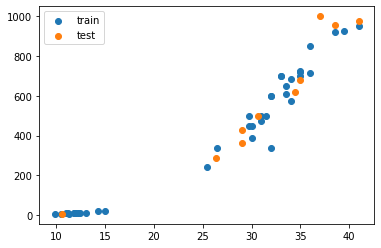

In [ ]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.legend(['train', 'test'])

In [ ]:
model = KNeighborsClassifier()
model.fit(train_input, train_target)

KNeighborsClassifier()

In [ ]:
model.predict(test_input)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
test_target

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
model.score(test_input, test_target) # test_input가지고 예측한 값과 test_target을 비교해서 맞은 개수 세다.

1.0

In [ ]:
data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [ ]:
model.predict([[25, 150]]) # 생각해보기

array([0])

In [ ]:
distance, idx = model.kneighbors([[25, 150]])
print(idx)

[[25 20  5 11 30]]


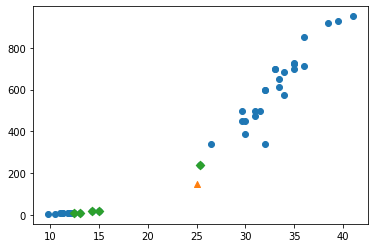

In [ ]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[idx, 0], train_input[idx, 1], marker = 'D')

In [ ]:
# 길이 데이터보다 무게 데이터를 더 중요하게 봤다.

data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [ ]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

In [ ]:
# 시험 데이터에다가도 훈련데이터의 평균을 빼고 훈련데이터의 표준편차로 나누는 이유?
train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

In [ ]:
np.mean(test_scaled, axis = 0)

array([0.49950891, 0.54228794])

In [ ]:
np.std(test_scaled, axis = 0)

array([0.7907457 , 0.97917078])

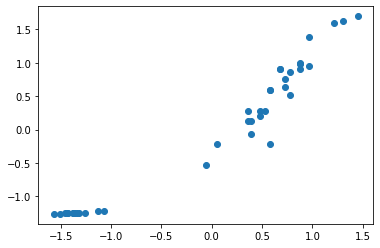

In [ ]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])

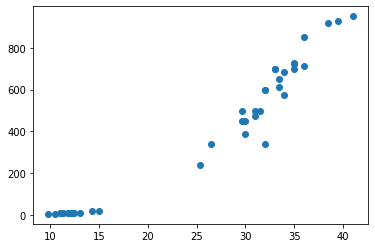

In [ ]:
plt.scatter(train_input[:, 0], train_input[:, 1])

In [ ]:
# StandardScaler / RobusterScaler / MinMaxScaler
model = KNeighborsClassifier()
model.fit(train_scaled, train_target)
model.score(test_scaled, test_target)

1.0

In [ ]:
new = ([25, 150] - mean) / std
new

array([-0.09710052, -0.81377399])

In [ ]:
model.predict([new])

array([1])

In [ ]:
distance, idx = model.kneighbors([new])

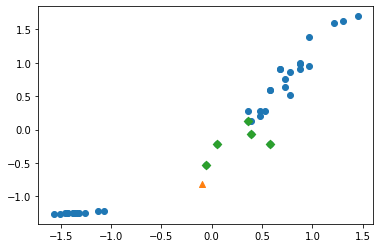

In [ ]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[idx, 0], train_scaled[idx, 1], marker='D')

In [ ]:
import pandas as pd

# 1. 문제집, 정답지 만들기
# 2. 데이터분할(훈련, 시험)
# 3. 데이터표준화
# 4. 모델 생성
# 5. 학습
# 6. 평가

fish2 = pd.read_csv("fish2.csv")

data = np.array(fish2[['Weight', 'Length', 'Diagonal', 'Height', 'Width']])
target = np.array(fish2['Species'])

train_input, test_input, train_target, test_target = train_test_split(data, target) # 75 : 25

mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

train_scaled = (train_input - mean) / std
test_scaled = (test_input - mean) / std

model = KNeighborsClassifier(n_neighbors=1)
model.fit(train_scaled, train_target)
score = model.score(test_scaled, test_target)
score

0.825

In [ ]:
model.predict(test_scaled)

array(['Parkki', 'Bream', 'Smelt', 'Perch', 'Roach', 'Bream', 'Perch',
       'Pike', 'Parkki', 'Bream', 'Roach', 'Perch', 'Perch', 'Bream',
       'Pike', 'Pike', 'Perch', 'Perch', 'Perch', 'Roach', 'Pike',
       'Bream', 'Smelt', 'Pike', 'Perch', 'Whitefish', 'Perch', 'Perch',
       'Perch', 'Smelt', 'Perch', 'Smelt', 'Bream', 'Perch', 'Perch',
       'Roach', 'Roach', 'Smelt', 'Smelt', 'Bream'], dtype=object)

In [ ]:
test_target

array(['Parkki', 'Bream', 'Smelt', 'Perch', 'Roach', 'Bream', 'Perch',
       'Pike', 'Parkki', 'Bream', 'Perch', 'Perch', 'Perch', 'Bream',
       'Pike', 'Pike', 'Whitefish', 'Perch', 'Perch', 'Roach', 'Pike',
       'Bream', 'Smelt', 'Pike', 'Roach', 'Whitefish', 'Perch', 'Roach',
       'Perch', 'Smelt', 'Roach', 'Smelt', 'Bream', 'Perch', 'Perch',
       'Perch', 'Perch', 'Smelt', 'Smelt', 'Bream'], dtype=object)

In [ ]:
fish2['Species'].drop_duplicates()

0          Bream
35         Roach
55     Whitefish
61        Parkki
72         Perch
128         Pike
145        Smelt
Name: Species, dtype: object

In [ ]:
target = np.array(fish2['Species'])

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris() # 딕셔너리 형태로
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris = load_iris()
data, target = iris['data'], iris['target']
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
df = pd.DataFrame(data, columns = iris['feature_names'])
df['target'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


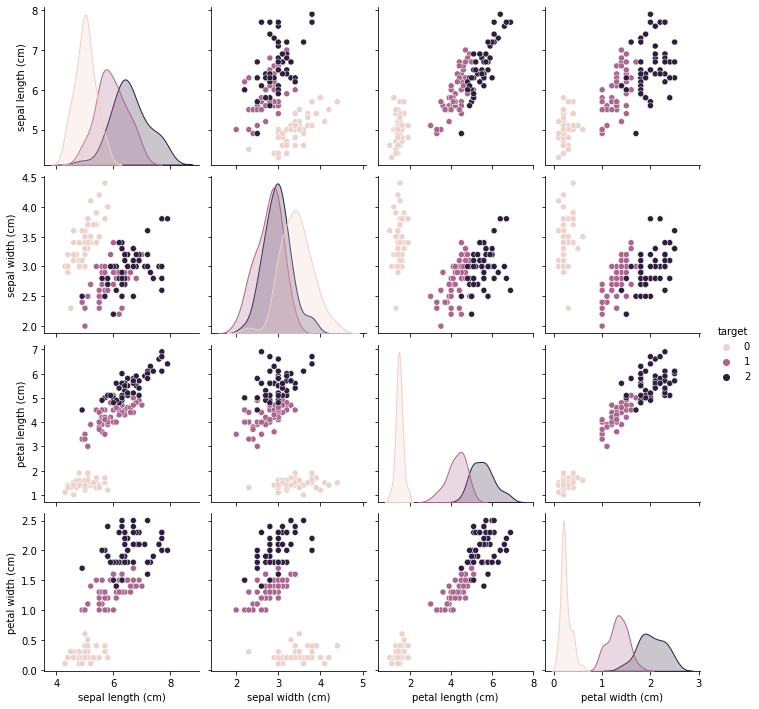

In [ ]:
import seaborn as sns
sns.pairplot(df, hue='target')

In [ ]:
# StandardScaler : 평균과 표준편차(이상치)
# RobustScaler : 중앙값
# MinMaxScaler : 최대값을 1, 최소값을 0 (음수가 있는 값 -1 ~ 1) // 이상치 엄청 예민 0~10, 10000
# 이미지(픽셀값 0부터 255)

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

iris = load_iris()
data, target = iris['data'], iris['target']

train_input, test_input, train_target, test_target = train_test_split(data, target)

ss = StandardScaler()
train_scaled = ss.fit_transform(train_input) # train_input 평균과 표준편차를 구해서 변환해서 train_scaled에 넣어라
test_scaled = ss.transform(test_input)

model = KNeighborsClassifier(n_neighbors=23)
model.fit(train_scaled, train_target)
score = model.score(test_scaled, test_target)
score

1.0

In [ ]:
# 회귀 : 연속적인 값 예측
# 정확도로 표현하는 것은 불가능
# 오차로 표현

f = open("perch.dat", 'rb')
perch = pickle.load(f)
f.close()

# 문제집 : 길이
# 정답지 : 무게

length, weight = perch

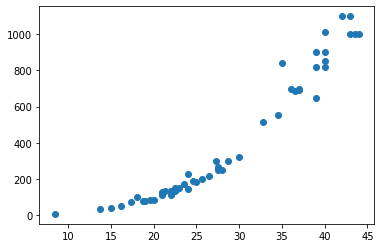

In [ ]:
plt.scatter(length, weight)

In [ ]:
# K 최근접 이웃 회귀 모델
from sklearn.neighbors import KNeighborsRegressor

# 문제집 : 2차원 행렬
# 정답지 : 1차원 행렬

# data = []
# for i in length:
#     data.append([i])
# data = np.array(data)

data = length.reshape(-1, 1) # -1 : 자동 // 자동행 1열

train_input, test_input, train_target, test_target = train_test_split(data, weight)

model = KNeighborsRegressor(n_neighbors=4)
model.fit(train_input, train_target)
score = model.score(test_input, test_target)
score

0.9510283956321214

In [ ]:
test_target

array([ 115. ,  850. ,  265. ,  125. ,  820. ,  170. ,  650. ,  690. ,
        150. ,  300. , 1000. ,   51.5, 1000. ,  100. ])

In [ ]:
model.predict(test_input)

array([ 123.75,  908.75,  244.5 ,  123.75,  908.75,  166.25,  908.75,
        731.25,  132.5 ,  244.5 , 1005.  ,   55.  , 1005.  ,   78.25])

In [ ]:
# MSE : 평균 제곱 오차
# MAE : 평균 절대 오차

np.mean(abs(model.predict(test_input) - test_target))

42.142857142857146